# Installing DepthAnything for Depth Estimation


In [ ]:
from pathlib import Path


repo_dir = Path("Depth-Anything-V2")

if not repo_dir.exists():
    !git clone https://huggingface.co/spaces/depth-anything/Depth-Anything-V2
%cd Depth-Anything-V2

Cloning into 'Depth-Anything-V2'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 154 (delta 46), reused 0 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (154/154), 7.75 MiB | 9.44 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Depth-Anything-V2


In [ ]:
import platform

%pip install -q "openvino>=2024.2.0" "datasets>=2.14.6" "nncf>=2.11.0" "tqdm" "matplotlib>=3.4"
%pip install -q "typing-extensions>=4.9.0" eval-type-backport "gradio>=4.19"
%pip install -q -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cpu

if platform.python_version_tuple()[1] in ["8", "9"]:
    %pip install -q "gradio-imageslider<=0.0.17" "typing-extensions>=4.9.0"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
attention_file_path = Path("./depth_anything_v2/dinov2_layers/attention.py")
orig_attention_path = attention_file_path.parent / ("orig_" + attention_file_path.name)

if not orig_attention_path.exists():
    attention_file_path.rename(orig_attention_path)

    with orig_attention_path.open("r") as f:
        data = f.read()
        data = data.replace("XFORMERS_AVAILABLE = True", "XFORMERS_AVAILABLE = False")
        with attention_file_path.open("w") as out_f:
            out_f.write(data)

In [ ]:
from huggingface_hub import hf_hub_download

encoder = "vits"
model_type = "Small"
model_id = f"depth_anything_v2_{encoder}"

model_path = hf_hub_download(repo_id=f"depth-anything/Depth-Anything-V2-{model_type}", filename=f"{model_id}.pth", repo_type="model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


depth_anything_v2_vits.pth:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

# Downloading nuScenes Dataset

In [ ]:
#Get image from nuscenes

!mkdir -p /data/sets/nuscenes

!wget https://www.nuscenes.org/data/v1.0-mini.tgz

!tar -xf v1.0-mini.tgz -C /data/sets/nuscenes

!pip install nuscenes-devkit &> /dev/null

--2024-11-02 16:03:36--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 3.162.112.84, 3.162.112.13, 3.162.112.92, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|3.162.112.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G   112MB/s    in 32s     

2024-11-02 16:04:08 (124 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]



# Displaying Sample Images

In [ ]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import RadarPointCloud
import matplotlib.pyplot as plt
import cv2

# Load the NuScenes dataset
nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

# Choose a sample (example using the first scene and first sample)
scene = nusc.scene[0]
first_sample_token = scene['first_sample_token']
sample = nusc.get('sample', first_sample_token)

# Get the front camera data from the sample
cam_front_data = sample['data']['CAM_FRONT']

# Load the image metadata
cam_front = nusc.get('sample_data', cam_front_data)

# Load the image file
image_path = nusc.get_sample_data_path(cam_front_data)
img = cv2.imread(image_path)

#choosing other samples

# Choose a sample (example using the first scene and first sample)
scene2 = nusc.scene[3]
first_sample_token2 = scene['first_sample_token']
sample2 = nusc.get('sample', first_sample_token2)

# Get the front camera data from the sample
cam_front_data2 = sample['data']['CAM_BACK']

# Load the image metadata
cam_front2 = nusc.get('sample_data', cam_front_data2)

# Load the image file
image_path2 = nusc.get_sample_data_path(cam_front_data2)
img2 = cv2.imread(image_path2)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.230 seconds.
Reverse indexing ...
Done reverse indexing in 0.3 seconds.


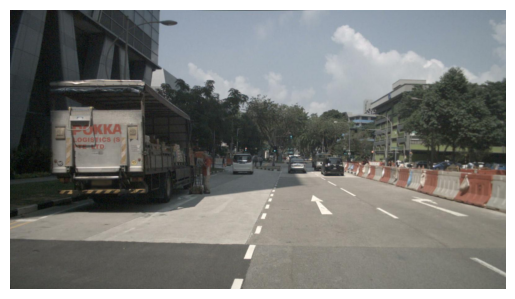

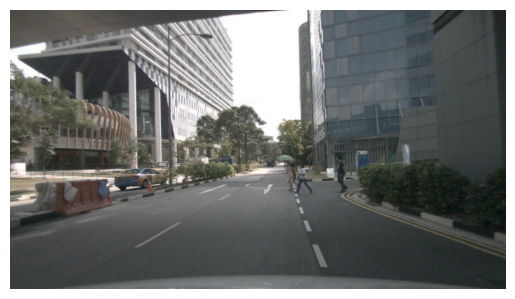

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import torch
import torch.nn.functional as F

from depth_anything_v2.dpt import DepthAnythingV2

model = DepthAnythingV2(encoder=encoder, features=64, out_channels=[48, 96, 192, 384])
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

raw_img = img
image, (h, w) = model.image2tensor(raw_img)
image = image.to("cpu").to(torch.float32)

with torch.no_grad():
    depth = model.forward(image)

depth = F.interpolate(depth[:, None], (h, w), mode="bilinear", align_corners=True)[0, 0]

output = depth.cpu().numpy()

<ipython-input-9-e9f7477e1d53>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location="cpu"))


# Sample Depth Estimation on nuScenes Image

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2


def get_depth_map(output, w, h):
    depth = cv2.resize(output, (w, h))

    depth = (depth - depth.min()) / (depth.max() - depth.min()) * 255.0
    depth = depth.astype(np.uint8)

    depth = cv2.applyColorMap(depth, cv2.COLORMAP_INFERNO)

    return depth

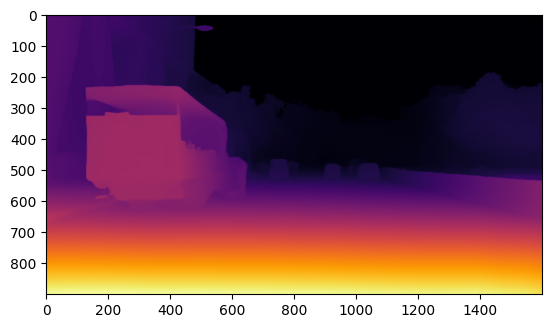

In [ ]:
h, w = raw_img.shape[:-1]
res_depth = get_depth_map(output, w, h)
plt.imshow(res_depth[:, :, ::-1])

# Downloading Detectron2 Model for 2D Object Detection

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 4.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15792, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 15792 (delta 15), reused 27 (delta 8), pack-reused 15743 (from 1)
Receiving objects: 100% (15792/15792), 6.37 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (11507/11507), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your en

In [ ]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires matplotlib>=3.7.1, but you have matp

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Running Detectron2 On Sample nuScenes Image

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

[11/02 16:07:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 98.7MB/s]                          
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([2, 2, 7, 2, 2, 0, 2, 2, 9, 2], device='cuda:0')
Boxes(tensor([[1002.1948,  474.8147, 1077.8014,  536.7258],
        [ 896.9116,  479.2071,  957.6199,  526.8022],
        [ 125.2271,  160.4897,  617.5515,  613.1305],
        [1361.1036,  484.8504, 1423.1603,  515.1666],
        [ 717.0093,  461.3268,  785.2176,  529.3829],
        [ 803.1168,  472.0064,  816.5465,  508.9730],
        [ 899.1501,  471.6318,  948.7336,  496.7751],
        [ 975.9593,  462.1656, 1029.8182,  515.2678],
        [ 849.1218,  447.6624,  859.1573,  458.9096],
        [1307.7889,  484.7197, 1352.8793,  510.9044]], device='cuda:0'))


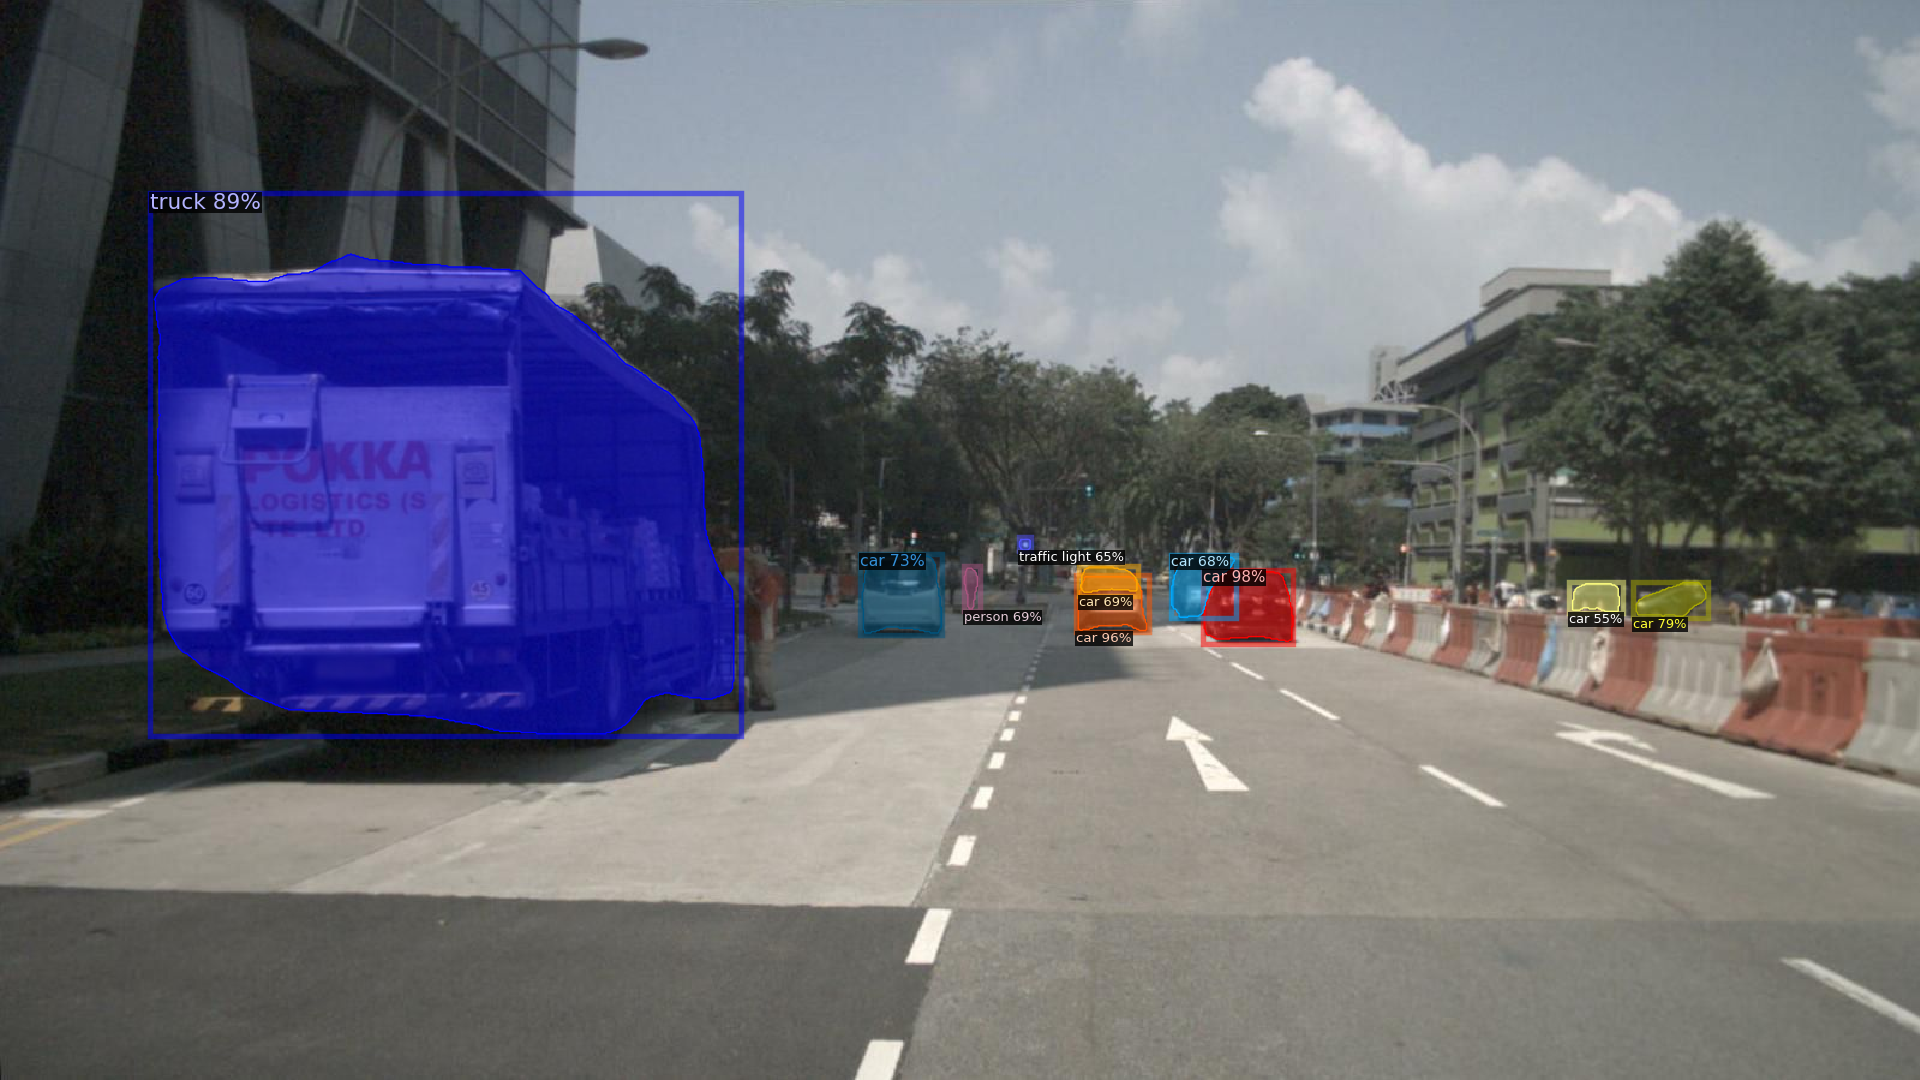

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

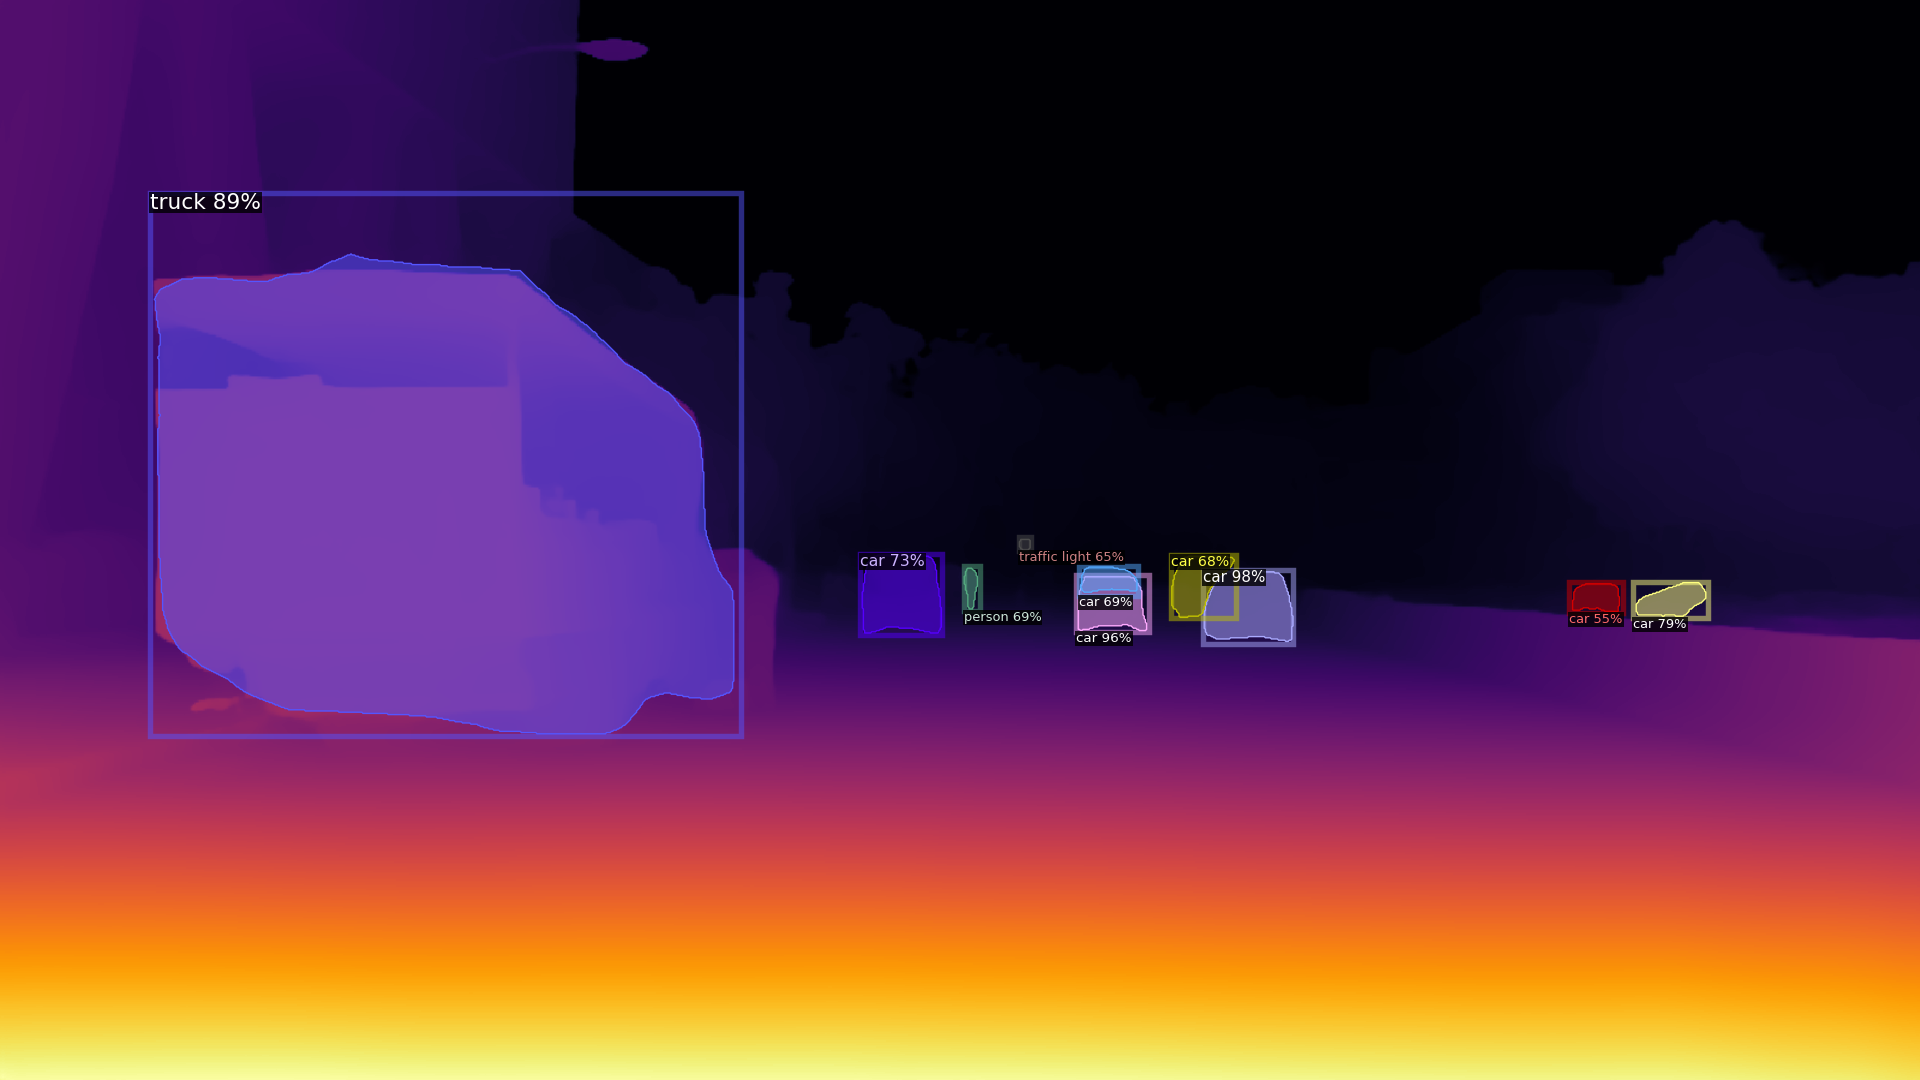

In [ ]:
#drawing bounding box on depth map
v = Visualizer(res_depth[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Calculating Median Depths Based on Segmentation Masks

In [ ]:
# print out median depths
masks = outputs["instances"].pred_masks if outputs["instances"].has("pred_masks") else None

median_depths = []
for i, mask in enumerate(masks):
    mask = mask.to("cpu").numpy()

    object_depth_values = res_depth[mask].flatten()

    object_depth_values = object_depth_values[object_depth_values > 0]

    if len(object_depth_values) > 0:
        median_depth = np.median(object_depth_values)
        median_depths.append(median_depth)
        print(f"Object {i} - Median Depth: {median_depth}")
    else:
        print(f"Object {i} has no valid depth values.")

Object 0 - Median Depth: 31.0
Object 1 - Median Depth: 28.0
Object 2 - Median Depth: 100.0
Object 3 - Median Depth: 22.0
Object 4 - Median Depth: 28.0
Object 5 - Median Depth: 17.0
Object 6 - Median Depth: 21.0
Object 7 - Median Depth: 11.0
Object 8 - Median Depth: 4.0
Object 9 - Median Depth: 17.0


In [ ]:
!pip install open3d plotly

#Getting Camera Calibration Data from nuScenes

In [ ]:
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud
from pyquaternion import Quaternion
import numpy as np

def get_camera_intrinsics(nusc, sample_data_token):
    calibrated_sensor = nusc.get('calibrated_sensor', nusc.get('sample_data', sample_data_token)['calibrated_sensor_token'])
    return np.array(calibrated_sensor['camera_intrinsic'])

def get_camera_extrinsics(nusc, sample_data_token):
    calibrated_sensor = nusc.get('calibrated_sensor', nusc.get('sample_data', sample_data_token)['calibrated_sensor_token'])

    rotation = np.array(calibrated_sensor['rotation'])
    translation = np.array(calibrated_sensor['translation'])

    rotation_matrix = Quaternion(rotation).rotation_matrix
    extrinsic_matrix = np.eye(4)
    extrinsic_matrix[:3, :3] = rotation_matrix
    extrinsic_matrix[:3, 3] = translation
    return extrinsic_matrix

**Finding Center Points of Segmentation Masks**

In [ ]:
from scipy.ndimage import center_of_mass

def get_center_of_segmentation_mask(masks):
  centers = []
  for mask in masks:
    mask = mask.to("cpu").numpy()
    center = center_of_mass(mask)
    centers.append(center)
  return centers

**Backprojection from 2D to 3D**

In [ ]:
import plotly.graph_objects as go

def back_project_2d_to_3d(center_2d, depth, intrinsic_matrix):
    center_2d_homogeneous = np.array([center_2d[0], center_2d[1], 1.0])

    center_3d_camera = depth * np.linalg.inv(intrinsic_matrix).dot(center_2d_homogeneous)
    return center_3d_camera

def transform_to_world_coordinates(point_3d_camera, extrinsic_matrix):
    point_3d_camera_homogeneous = np.append(point_3d_camera, 1.0)

    point_3d_world = extrinsic_matrix.dot(point_3d_camera_homogeneous)
    return point_3d_world[:3]

import open3d as o3d

def create_point_cloud(points):
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(points)
    return point_cloud

def visualize_point_cloud(points):
    fig = go.Figure(data=[go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(size=5, color='blue', opacity=0.8)
    )])
    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'),
        width=800,
        height=800)
    fig.show()


**Visualizing Point Cloud for Sample nuScenes Image**

In [ ]:
scene = nusc.scene[0]
first_sample_token = scene['first_sample_token']
first_sample = nusc.get('sample', first_sample_token)

sample_data_token = first_sample['data']['CAM_FRONT']

intrinsic = get_camera_intrinsics(nusc, sample_data_token)
extrinsic = get_camera_extrinsics(nusc, sample_data_token)

print("Intrinsic matrix (camera calibration):", intrinsic)
print("Extrinsic matrix (world to camera transformation):", extrinsic)

center_2d = get_center_of_segmentation_mask(masks)

center_3d_world_list = []

for i in range(0,len(center_2d)):
    center_3d_camera = back_project_2d_to_3d(center_2d[i], median_depths[i], intrinsic)
    center_3d_world = transform_to_world_coordinates(center_3d_camera, extrinsic)
    center_3d_world_list.append(center_3d_world)

points_3d = np.array(center_3d_world_list)

visualize_point_cloud(points_3d)

Intrinsic matrix (camera calibration): [[1.26641720e+03 0.00000000e+00 8.16267020e+02]
 [0.00000000e+00 1.26641720e+03 4.91507066e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Extrinsic matrix (world to camera transformation): [[ 5.68477868e-03 -5.63666773e-03  9.99967955e-01  1.70079119e+00]
 [-9.99983517e-01 -8.37115272e-04  5.68014846e-03  1.59456324e-02]
 [ 8.05071338e-04 -9.99983763e-01 -5.64133364e-03  1.51095764e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**Converting 3D Point Cloud to Bird's Eye View**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convert_to_bev(points, grid_size, range_x, range_y):
    # Create an empty BEV grid
    bev_grid = np.zeros((grid_size[1], grid_size[0]))

    # Convert points to grid coordinates
    for point in points:
        x, y, z = point

        # Define grid resolution
        grid_x = int((x - range_x[0]) / (range_x[1] - range_x[0]) * grid_size[0])
        grid_y = int((y - range_y[0]) / (range_y[1] - range_y[0]) * grid_size[1])

        # Check bounds
        if 0 <= grid_x < grid_size[0] and 0 <= grid_y < grid_size[1]:
            # Accumulate height information or count points in the cell
            bev_grid[grid_y, grid_x] += 1  # Here we're counting the points

    return bev_grid

def visualize_bev(bev_grid):
    plt.imshow(bev_grid, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Point Count')
    plt.xlabel('X Grid Index')
    plt.ylabel('Y Grid Index')
    plt.title('Bird\'s Eye View')
    plt.show()

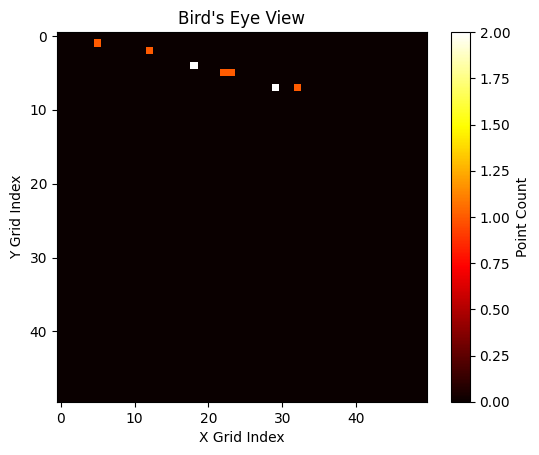

In [ ]:
grid_size = (50, 50)  # Size of the BEV grid (width, height)
range_x = (0, 50)        # X range of the grid
range_y = (0, 50)        # Y range of the grid

# Convert to BEV
bev_grid = convert_to_bev(points_3d, grid_size, range_x, range_y)

# Visualize BEV
visualize_bev(bev_grid)

#HEURISTICS
get width, height, length average for cars and trucks (no pedestrians etc) then plot a 3d cuboid around each central point from the graph that we plotted already




This is for dataset 0




This is for randomized datasets. Not all of them show up in the 3D cuboid



Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.194 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.
Selected scene: scene-0916
Selected sample token: 0bb62a68055249e381b039bf54b0ccf8
Plotting box for vehicle.car at [6.953070e+02 1.800632e+03 6.150000e-01]
Plotting box for vehicle.car at [6.831960e+02 1.784503e+03 1.300000e-02]
Plotting box for vehicle.car at [7.028260e+02 1.809912e+03 8.260000e-01]
Plotting box for vehicle.car at [6.959150e+02 1.817062e+03 1.290000e+00]
Plotting box for vehicle.car at [6.942660e+02 1.790387e+03 2.360000e-01]
Plotting box for vehicle.car at [6.678730e+02 1.818085e+03 1.600000e+00]
Plotting box for vehicle.car at [6.869070e+02 1.809524e+03 1.394000e+00]
Plotting box for vehicle.car at [7.008090e+02 1.811906e+03 1.016000e+00]
Plotting b

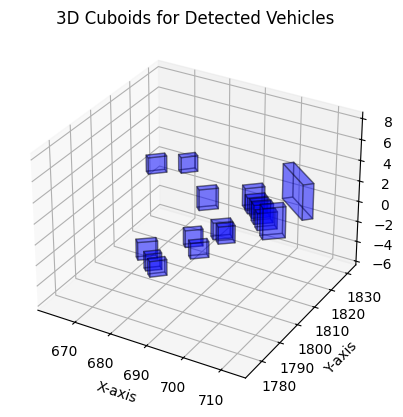

In [ ]:
import random
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np

# Load the NuScenes mini dataset
nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

# Function to plot a 3D cuboid based on the bounding box
def plot_3d_cuboid(ax, box: Box):
    corners = box.corners().T  # Get corners of the bounding box
    faces = [
        [corners[j] for j in [0, 1, 2, 3]],  # Bottom face
        [corners[j] for j in [4, 5, 6, 7]],  # Top face
        [corners[j] for j in [0, 3, 7, 4]],  # Left face
        [corners[j] for j in [1, 2, 6, 5]],  # Right face
        [corners[j] for j in [0, 1, 5, 4]],  # Front face
        [corners[j] for j in [3, 2, 6, 7]]   # Back face
    ]
    ax.add_collection3d(Poly3DCollection(faces, color='blue', alpha=0.3, edgecolor='k'))

# Function to get a valid sample with vehicle annotations
def get_valid_sample():
    while True:
        # Randomly select a scene
        random_scene = random.choice(nusc.scene)
        first_sample_token = random_scene['first_sample_token']

        # Collect all sample tokens in this scene
        sample_token = first_sample_token
        sample_tokens = []
        while sample_token:
            sample_tokens.append(sample_token)
            sample = nusc.get('sample', sample_token)
            sample_token = sample['next']

        # Randomly select a sample from the scene
        random_sample_token = random.choice(sample_tokens)
        sample = nusc.get('sample', random_sample_token)

        # Check if this sample has any relevant vehicle types
        has_vehicle = any(
            'vehicle.car' in ann['category_name'] or
            'vehicle.truck' in ann['category_name'] or
            'vehicle.bus.rigid' in ann['category_name']
            for ann_token in sample['anns']
            for ann in [nusc.get('sample_annotation', ann_token)]
        )

        if has_vehicle:
            print(f"Selected scene: {random_scene['name']}")
            print(f"Selected sample token: {random_sample_token}")
            return sample

# Get a valid sample with vehicles
sample = get_valid_sample()

# Initialize min and max values for setting dynamic plot limits
min_x, min_y, min_z = float('inf'), float('inf'), float('inf')
max_x, max_y, max_z = float('-inf'), float('-inf'), float('-inf')

# Find min and max coordinates for the sample
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    category_name = ann['category_name']

    if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
        box = nusc.get_box(ann['token'])

        if box is not None:
            corners = box.corners()
            min_x = min(min_x, corners[0].min())
            max_x = max(max_x, corners[0].max())
            min_y = min(min_y, corners[1].min())
            max_y = max(max_y, corners[1].max())
            min_z = min(min_z, corners[2].min())
            max_z = max(max_z, corners[2].max())

# Add some padding to the limits for better visibility
padding = 5
min_x, max_x = min_x - padding, max_x + padding
min_y, max_y = min_y - padding, max_y + padding
min_z, max_z = min_z - padding, max_z + padding

# Set up the 3D plot with dynamic limits
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
ax.set_zlim(min_z, max_z)

# Plot each vehicle cuboid
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    category_name = ann['category_name']

    if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
        box = nusc.get_box(ann['token'])

        if box is not None:
            print(f"Plotting box for {category_name} at {box.center}")
            plot_3d_cuboid(ax, box)

# Set labels and show plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Cuboids for Detected Vehicles')
plt.show()



Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.392 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.
Selected scene: scene-1077
Selected sample token: ed2e7d24f2ad41abb3d37cd9a0ca8e89
Plotting 3D box for vehicle.car at [6.627940e+02 1.936094e+03 9.440000e-01]
Plotting 3D box for vehicle.car at [6.163080e+02 1.981168e+03 1.265000e+00]
Plotting 3D box for vehicle.car at [ 574.076 2038.183    2.883]
Plotting 3D box for vehicle.car at [5.86882e+02 1.99954e+03 1.78200e+00]
Plotting 3D box for vehicle.car at [5.975650e+02 2.009815e+03 1.868000e+00]
Plotting 3D box for vehicle.car at [6.691770e+02 1.916405e+03 8.470000e-01]
Plotting 3D box for vehicle.car at [6.36814e+02 1.96221e+03 9.82000e-01]
Plotting 3D box for vehicle.car at [ 596.296 2022.884    2.034]
Plotting 3D box 

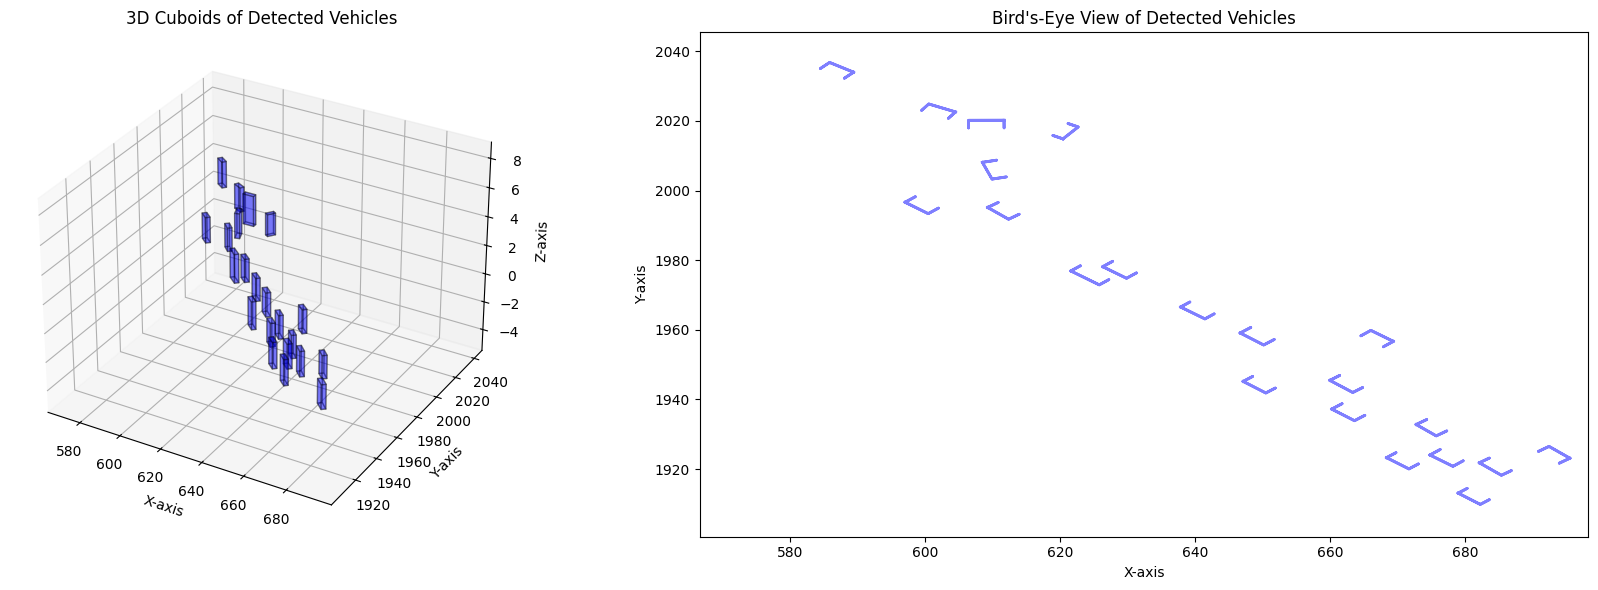

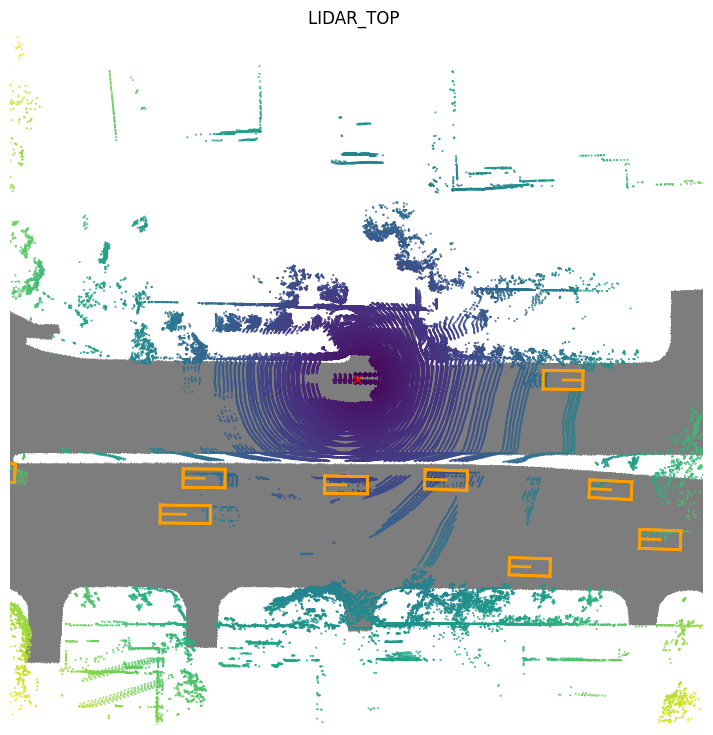

In [ ]:
import random
import math
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
import matplotlib.pyplot as plt
import numpy as np

# Load the NuScenes mini dataset
nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

# Function to plot a 3D cuboid based on the bounding box
def plot_3d_cuboid(ax, box: Box):
    corners = box.corners().T  # Get corners of the bounding box
    faces = [
        [corners[j] for j in [0, 1, 2, 3]],  # Bottom face
        [corners[j] for j in [4, 5, 6, 7]],  # Top face
        [corners[j] for j in [0, 3, 7, 4]],  # Left face
        [corners[j] for j in [1, 2, 6, 5]],  # Right face
        [corners[j] for j in [0, 1, 5, 4]],  # Front face
        [corners[j] for j in [3, 2, 6, 7]]   # Back face
    ]
    ax.add_collection3d(Poly3DCollection(faces, color='blue', alpha=0.3, edgecolor='k'))

# Function to rotate points by a given angle in radians
def rotate_points(points, angle_rad):
    """Rotate points by a given angle in radians."""
    rotation_matrix = np.array([
        [math.cos(angle_rad), -math.sin(angle_rad)],
        [math.sin(angle_rad), math.cos(angle_rad)]
    ])
    return np.dot(points, rotation_matrix.T)

# Function to plot a 2D bounding box for bird's-eye view
def plot_2d_bounding_box(ax, rotated_corners):
    x_coords = np.append(rotated_corners[:, 0], rotated_corners[0, 0])  # Close the loop
    y_coords = np.append(rotated_corners[:, 1], rotated_corners[0, 1])
    ax.plot(x_coords, y_coords, color='blue', alpha=0.5, linewidth=2)

# Function to get a valid sample with vehicle annotations
def get_valid_sample():
    while True:
        # Randomly select a scene
        random_scene = random.choice(nusc.scene)
        first_sample_token = random_scene['first_sample_token']

        # Collect all sample tokens in this scene
        sample_token = first_sample_token
        sample_tokens = []
        while sample_token:
            sample_tokens.append(sample_token)
            sample = nusc.get('sample', sample_token)
            sample_token = sample['next']

        # Randomly select a sample from the scene
        random_sample_token = random.choice(sample_tokens)
        sample = nusc.get('sample', random_sample_token)

        # Check if this sample has any relevant vehicle types
        has_vehicle = any(
            'vehicle.car' in ann['category_name'] or
            'vehicle.truck' in ann['category_name'] or
            'vehicle.bus.rigid' in ann['category_name']
            for ann_token in sample['anns']
            for ann in [nusc.get('sample_annotation', ann_token)]
        )

        if has_vehicle:
            print(f"Selected scene: {random_scene['name']}")
            print(f"Selected sample token: {random_sample_token}")
            return sample

# Get a valid sample with vehicles
sample = get_valid_sample()

# Get the ego vehicle's yaw angle from the LiDAR data's ego pose
lidar_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
ego_pose = nusc.get('ego_pose', lidar_data['ego_pose_token'])
yaw_angle = math.atan2(ego_pose['rotation'][1], ego_pose['rotation'][0])  # Get yaw in radians

# Initialize min and max values for setting dynamic plot limits
min_x, min_y, min_z = float('inf'), float('inf'), float('inf')
max_x, max_y, max_z = float('-inf'), float('-inf'), float('-inf')

# Find min and max coordinates for the sample
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    category_name = ann['category_name']

    if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
        box = nusc.get_box(ann['token'])

        if box is not None:
            corners = box.corners()
            min_x = min(min_x, corners[0].min())
            max_x = max(max_x, corners[0].max())
            min_y = min(min_y, corners[1].min())
            max_y = max(max_y, corners[1].max())
            min_z = min(min_z, corners[2].min())
            max_z = max(max_z, corners[2].max())

# Add padding to the limits for better visibility
padding = 5
min_x, max_x = min_x - padding, max_x + padding
min_y, max_y = min_y - padding, max_y + padding
min_z, max_z = min_z - padding, max_z + padding

# Set up the figure with two subplots for 3D cuboid and 2D bird's-eye view
fig = plt.figure(figsize=(18, 6))

# 1. 3D Cuboid Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlim(min_x, max_x)
ax1.set_ylim(min_y, max_y)
ax1.set_zlim(min_z, max_z)

# Plot each vehicle cuboid in 3D
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    category_name = ann['category_name']

    if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
        box = nusc.get_box(ann['token'])

        if box is not None:
            print(f"Plotting 3D box for {category_name} at {box.center}")
            plot_3d_cuboid(ax1, box)

ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('3D Cuboids of Detected Vehicles')

# 2. Adjusted Bird's-Eye View (Top-Down) Plot in 2D
ax2 = fig.add_subplot(122)
ax2.set_xlim(min_x, max_x)
ax2.set_ylim(min_y, max_y)

# Rotate each bounding box by the ego vehicle's yaw angle and plot
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    category_name = ann['category_name']

    if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
        box = nusc.get_box(ann['token'])

        if box is not None:
            # Extract x, y corners and apply rotation
            corners = box.corners().T[:, :2]  # Take only x, y points
            rotated_corners = rotate_points(corners, yaw_angle)
            plot_2d_bounding_box(ax2, rotated_corners)

ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('Bird\'s-Eye View of Detected Vehicles')

# Display the two plots
plt.tight_layout()
plt.show()

# 3. LiDAR Plot using `nusc.render_sample_data`
# Render the LiDAR data with multiple sweeps and an underlay map
nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=5, underlay_map=True)


In [ ]:
import math
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import Box
import matplotlib.pyplot as plt
import numpy as np

# Load the NuScenes mini dataset
nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

# Function to plot a 3D cuboid based on the bounding box
def plot_3d_cuboid(ax, box: Box):
    corners = box.corners().T  # Get corners of the bounding box
    faces = [
        [corners[j] for j in [0, 1, 2, 3]],  # Bottom face
        [corners[j] for j in [4, 5, 6, 7]],  # Top face
        [corners[j] for j in [0, 3, 7, 4]],  # Left face
        [corners[j] for j in [1, 2, 6, 5]],  # Right face
        [corners[j] for j in [0, 1, 5, 4]],  # Front face
        [corners[j] for j in [3, 2, 6, 7]]   # Back face
    ]
    ax.add_collection3d(Poly3DCollection(faces, color='blue', alpha=0.3, edgecolor='k'))

# Function to rotate points by a given angle in radians
def rotate_points(points, angle_rad):
    """Rotate points by a given angle in radians."""
    rotation_matrix = np.array([
        [math.cos(angle_rad), -math.sin(angle_rad)],
        [math.sin(angle_rad), math.cos(angle_rad)]
    ])
    return np.dot(points, rotation_matrix.T)

# Function to plot a 2D bounding box for bird's-eye view
def plot_2d_bounding_box(ax, rotated_corners):
    x_coords = np.append(rotated_corners[:, 0], rotated_corners[0, 0])  # Close the loop
    y_coords = np.append(rotated_corners[:, 1], rotated_corners[0, 1])
    ax.plot(x_coords, y_coords, color='blue', alpha=0.5, linewidth=2)

# Function to get a specific sample based on scene name and sample index
def get_sample_by_index(scene_name, sample_index):
    # Find the scene by name
    selected_scene = next((scene for scene in nusc.scene if scene['name'] == scene_name), None)
    if not selected_scene:
        print(f"Scene '{scene_name}' not found.")
        return None

    # Collect all sample tokens in this scene
    sample_token = selected_scene['first_sample_token']
    sample_tokens = []
    while sample_token:
        sample_tokens.append(sample_token)
        sample = nusc.get('sample', sample_token)
        sample_token = sample['next']

    # Check if the specified index is valid
    if sample_index >= len(sample_tokens):
        print(f"Sample index {sample_index} out of range for scene '{scene_name}'")
        return None

    # Retrieve the sample at the specified index
    sample_token = sample_tokens[sample_index]
    sample = nusc.get('sample', sample_token)

    print(f"Selected scene: {scene_name}")
    print(f"Selected sample index: {sample_index} with sample token: {sample_token}")
    return sample

# Choose a specific scene and sample index
scene_name = 'scene-0061'  # Replace with desired scene name
sample_index = 5  # Replace with desired sample index

# Get the selected sample
sample = get_sample_by_index(scene_name, sample_index)
if sample is None:
    print("Invalid scene or sample index.")
else:
    # Get the ego vehicle's yaw angle from the LiDAR data's ego pose
    lidar_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
    ego_pose = nusc.get('ego_pose', lidar_data['ego_pose_token'])
    yaw_angle = math.atan2(ego_pose['rotation'][1], ego_pose['rotation'][0])  # Get yaw in radians

    # Initialize min and max values for setting dynamic plot limits
    min_x, min_y, min_z = float('inf'), float('inf'), float('inf')
    max_x, max_y, max_z = float('-inf'), float('-inf'), float('-inf')

    # Find min and max coordinates for the sample
    for ann_token in sample['anns']:
        ann = nusc.get('sample_annotation', ann_token)
        category_name = ann['category_name']

        if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
            box = nusc.get_box(ann['token'])

            if box is not None:
                corners = box.corners()
                min_x = min(min_x, corners[0].min())
                max_x = max(max_x, corners[0].max())
                min_y = min(min_y, corners[1].min())
                max_y = max(max_y, corners[1].max())
                min_z = min(min_z, corners[2].min())
                max_z = max(max_z, corners[2].max())

    # Add padding to the limits for better visibility
    padding = 5
    min_x, max_x = min_x - padding, max_x + padding
    min_y, max_y = min_y - padding, max_y + padding
    min_z, max_z = min_z - padding, max_z + padding

    # Set up the figure with two subplots for 3D cuboid and 2D bird's-eye view
    fig = plt.figure(figsize=(18, 6))

    # 1. 3D Cuboid Plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_xlim(min_x, max_x)
    ax1.set_ylim(min_y, max_y)
    ax1.set_zlim(min_z, max_z)

    # Plot each vehicle cuboid in 3D
    for ann_token in sample['anns']:
        ann = nusc.get('sample_annotation', ann_token)
        category_name = ann['category_name']

        if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
            box = nusc.get_box(ann['token'])

            if box is not None:
                print(f"Plotting 3D box for {category_name} at {box.center}")
                plot_3d_cuboid(ax1, box)

    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    ax1.set_zlabel('Z-axis')
    ax1.set_title('3D Cuboids of Detected Vehicles')

    # 2. Adjusted Bird's-Eye View (Top-Down) Plot in 2D
    ax2 = fig.add_subplot(122)
    ax2.set_xlim(min_x, max_x)
    ax2.set_ylim(min_y, max_y)

    # Rotate each bounding box by the ego vehicle's yaw angle and plot
    for ann_token in sample['anns']:
        ann = nusc.get('sample_annotation', ann_token)
        category_name = ann['category_name']

        if category_name in ['vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid']:
            box = nusc.get_box(ann['token'])

            if box is not None:
                # Extract x, y corners and apply rotation
                corners = box.corners().T[:, :2]  # Take only x, y points
                rotated_corners = rotate_points(corners, yaw_angle)
                plot_2d_bounding_box(ax2, rotated_corners)

    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_title('Bird\'s-Eye View of Detected Vehicles')

    # Display the two plots
    plt.tight_layout()
    plt.show()

    # 3. LiDAR Plot using `nusc.render_sample_data`
    # Render the LiDAR data with multiple sweeps and an underlay map
    nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=5, underlay_map=True)


ModuleNotFoundError: No module named 'nuscenes'

car
car
truck
car
car
person
car
car
traffic light
car


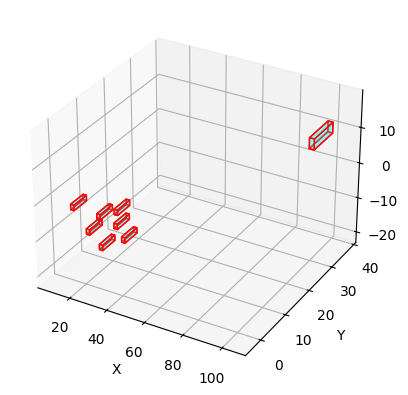

In [ ]:
COCO_CLASSES = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork",
    "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
    "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV",
    "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink",
    "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

pred_classes = outputs["instances"].pred_classes
pred_class_names = [COCO_CLASSES[i] for i in pred_classes]
for i in pred_class_names:
  print(i)

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# Average dimensions for cars and trucks in meters (Width, Height, Length)
average_dimensions = {
    'car': (1.8, 1.5, 4.5),
    'truck': (2.5, 3.0, 8.0)
}

cuboids = []

for i, category in enumerate(pred_class_names):
    if category in average_dimensions:
        width, height, length = average_dimensions[category]
        center_point = center_3d_world_list[i]

        cuboids.append((center_point, width, height, length))

def plot_multiple_cuboids(cuboids):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    for cuboid in cuboids:
        center, width, height, length = cuboid
        x_c, y_c, z_c = center
        dx = width / 2
        dy = length / 2
        dz = height / 2

        vertices = np.array([
            [x_c - dx, y_c - dy, z_c - dz],
            [x_c + dx, y_c - dy, z_c - dz],
            [x_c + dx, y_c + dy, z_c - dz],
            [x_c - dx, y_c + dy, z_c - dz],
            [x_c - dx, y_c - dy, z_c + dz],
            [x_c + dx, y_c - dy, z_c + dz],
            [x_c + dx, y_c + dy, z_c + dz],
            [x_c - dx, y_c + dy, z_c + dz]
        ])

        faces = [
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
            [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Front face
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Back face
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # Right face
            [vertices[0], vertices[3], vertices[7], vertices[4]]   # Left face
        ]

        ax.add_collection3d(Poly3DCollection(faces, facecolors="cyan", linewidths=1, edgecolors="r", alpha=.25))

    all_x = [center[0] for center, _, _, _ in cuboids]
    all_y = [center[1] for center, _, _, _ in cuboids]
    all_z = [center[2] for center, _, _, _ in cuboids]
    max_dim = max([width for _, width, _, _ in cuboids] + [length for _, _, length, _ in cuboids] + [height for _, _, _, height in cuboids])

    ax.set_xlim(min(all_x) - max_dim, max(all_x) + max_dim)
    ax.set_ylim(min(all_y) - max_dim, max(all_y) + max_dim)
    ax.set_zlim(min(all_z) - max_dim, max(all_z) + max_dim)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

plot_multiple_cuboids(cuboids)



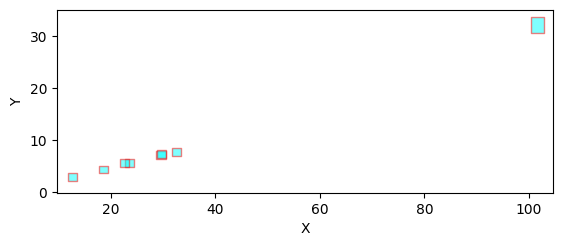

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def plot_multiple_cuboids_2d(cuboids):
    fig, ax = plt.subplots()

    patches = []

    for cuboid in cuboids:
        center, width, length, height = cuboid
        x_c, y_c, _ = center
        dx = width / 2
        dy = length / 2

        vertices = np.array([
            [x_c - dx, y_c - dy],
            [x_c + dx, y_c - dy],
            [x_c + dx, y_c + dy],
            [x_c - dx, y_c + dy]
        ])

        polygon = Polygon(vertices, closed=True)
        patches.append(polygon)

    p = PatchCollection(patches, facecolor="cyan", edgecolor="r", alpha=0.5)
    ax.add_collection(p)

    all_x = [center[0] for center, _, _, _ in cuboids]
    all_y = [center[1] for center, _, _, _ in cuboids]
    max_dim = max([width for _, width, _, _ in cuboids] + [length for _, _, length, _ in cuboids])

    ax.set_xlim(min(all_x) - max_dim, max(all_x) + max_dim)
    ax.set_ylim(min(all_y) - max_dim, max(all_y) + max_dim)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal', 'box')

    plt.show()

plot_multiple_cuboids_2d(cuboids)
#plot w. width and length
#add box/dot that represents autonomous vehicle
#plot nuscenes ground truth cuboids and compare with generated 3d cuboids
#nuscenes stops at 30m

#orientation: use map prior lane markings/lines


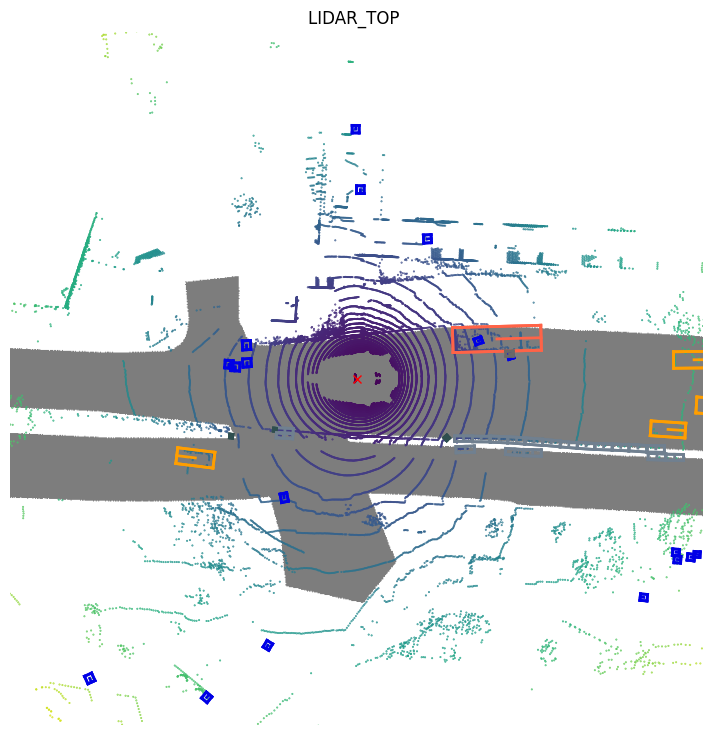

In [ ]:
scene = nusc.scene[0]
first_sample_token = scene['first_sample_token']
sample = nusc.get('sample', first_sample_token)
nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=5, underlay_map=True)
#challenging scene due to orientation of av
#pick example w. straight orientation
#(INSTEAD OF 3D CUBOIDS) plot BEV prediction boxes onto the ground truth
#see if we can get uncropped lidar plot
#query for closest lane line to center point, apply that to orient